In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=6280f24488e53156e8fa713aaae437c93e90802d6b91eb564749a980136de795
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import matplotlib.pyplot as plt


In [29]:
import pyspark
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DoubleType
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import count,lit
from pyspark.sql import functions as F
from pyspark.sql.functions import max, min

In [4]:
#Spark SQL -> create a spark session
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [6]:
# Read the CSV
df = spark.read.csv("/content/charcters_stats.csv", header = True, inferSchema = True)
df.show()

+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|             Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|          3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
|           A-Bomb|     good|          38|     100|   17|        80|   17|    64|  316|
|       Abe Sapien|     good|          88|      14|   35|        42|   35|    85|  299|
|         Abin Sur|     good|          50|      90|   53|        64|   84|    65|  406|
|      Abomination|      bad|          63|      80|   53|        90|   55|    95|  436|
|          Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
|      Adam Monroe|     good|          63|      10|   12|       100|   71|    64|  320|
|     Adam Strange|     good|           1|       1|    1|         1|    0|     1|    5|
|        Agent  13|     good|   

In [7]:
# reading the first record
print(df.first())

Row(Name='3-D Man', Alignment='good', Intelligence=50, Strength=31, Speed=43, Durability=32, Power=25, Combat=52, Total=233)


In [8]:
# number of rows and columns
print(f"The number of rows are: {df.count()}")
print(f"The number of columns are: {len(df.columns)}")

The number of rows are: 611
The number of columns are: 9


In [9]:
#Number of characters fall under each alignment
characters_align = df.groupby('Alignment')\
                      .agg({'Name':'count'}).alias("Number of Characters")\
                      .filter(col('Alignment').isNotNull())

characters_align.show()

+---------+-----------+
|Alignment|count(Name)|
+---------+-----------+
|  neutral|         11|
|      bad|        165|
|     good|        432|
+---------+-----------+



In [10]:
#Finding the good alignment characters
good_charac = df.where("Alignment == 'good'")

good_charac.show()

+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|             Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|          3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
|           A-Bomb|     good|          38|     100|   17|        80|   17|    64|  316|
|       Abe Sapien|     good|          88|      14|   35|        42|   35|    85|  299|
|         Abin Sur|     good|          50|      90|   53|        64|   84|    65|  406|
|      Adam Monroe|     good|          63|      10|   12|       100|   71|    64|  320|
|     Adam Strange|     good|           1|       1|    1|         1|    0|     1|    5|
|        Agent  13|     good|           1|       1|    1|         1|    0|     1|    5|
|        Agent Bob|     good|          10|       8|   13|         5|    5|    20|   61|
|       Agent Zero|     good|   

In [11]:
#Showing first 5 records
good_charac.limit(5).show()


+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|       Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|    3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
|     A-Bomb|     good|          38|     100|   17|        80|   17|    64|  316|
| Abe Sapien|     good|          88|      14|   35|        42|   35|    85|  299|
|   Abin Sur|     good|          50|      90|   53|        64|   84|    65|  406|
|Adam Monroe|     good|          63|      10|   12|       100|   71|    64|  320|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+



In [12]:
#Select the top five heroes with the highest speed who have a good alignment

top5_high_speed = good_charac.orderBy('Speed', ascending = False)\
                              .limit(5)

top5_high_speed.show()

+----------+---------+------------+--------+-----+----------+-----+------+-----+
|      Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+----------+---------+------------+--------+-----+----------+-----+------+-----+
|   Flash I|     good|          63|      10|  100|        50|   57|    32|  312|
|  Flash II|     good|          63|      10|  100|        60|   66|    32|  331|
|  Flash IV|     good|          63|      10|  100|        32|   59|    48|  312|
| Flash III|     good|          63|      10|  100|        60|   83|    32|  348|
|Black Bolt|     good|          75|      67|  100|        84|  100|    56|  482|
+----------+---------+------------+--------+-----+----------+-----+------+-----+



In [13]:
#Select five heroes with maximum power who have a good alignment
top5_high_power = good_charac.orderBy('Power', ascending = False)\
                              .limit(5)

top5_high_power.show()

+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|          Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|       Deadman|     good|          50|      10|   33|       100|  100|    42|  335|
|     Firestorm|     good|          50|      53|   58|        56|  100|    42|  359|
|   Doctor Fate|     good|          81|      16|   25|        80|  100|    50|  352|
|         Cable|     good|          88|      48|   23|        56|  100|    80|  395|
|Doctor Strange|     good|         100|      10|   12|        84|  100|    60|  366|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+



In [14]:
#Find out how many superheroes there are with power of 100 with good alignment

power_100 = good_charac.where("Power == 100")
print(power_100.count())

33


In [15]:
#Display the record of the previous question
power_100.show()

+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|             Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|    Beta Ray Bill|     good|          63|      80|   35|        95|  100|    84|  457|
|         Beyonder|     good|          88|     100|   23|       100|  100|    56|  467|
|       Black Bolt|     good|          75|      67|  100|        84|  100|    56|  482|
|            Cable|     good|          88|      48|   23|        56|  100|    80|  395|
|          Deadman|     good|          50|      10|   33|       100|  100|    42|  335|
|      Doctor Fate|     good|          81|      16|   25|        80|  100|    50|  352|
|   Doctor Strange|     good|         100|      10|   12|        84|  100|    60|  366|
|     Dr Manhattan|     good|          88|      32|   42|        95|  100|    42|  399|
|        Firestorm|     good|   

In [16]:
#first 5 records
power_100.limit(5).show()

+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|         Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|Beta Ray Bill|     good|          63|      80|   35|        95|  100|    84|  457|
|     Beyonder|     good|          88|     100|   23|       100|  100|    56|  467|
|   Black Bolt|     good|          75|      67|  100|        84|  100|    56|  482|
|        Cable|     good|          88|      48|   23|        56|  100|    80|  395|
|      Deadman|     good|          50|      10|   33|       100|  100|    42|  335|
+-------------+---------+------------+--------+-----+----------+-----+------+-----+



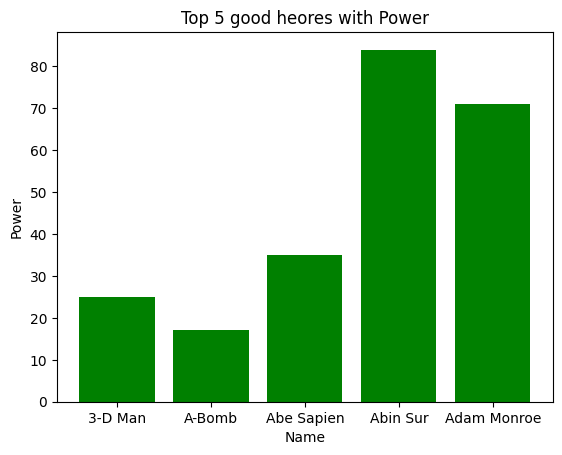

In [17]:
'''
Draw a bar plot of all superheroes who are having good alignment
and a max power of the top five heroes only , take the same object of point 13,
show name and total in plot with green bars '''

df1 = good_charac.limit(5)
x_val = df1.select("Name").rdd.flatMap(lambda x: x).collect()
y_val = df1.select("Power").rdd.flatMap(lambda x: x).collect()
plt.bar(x_val, y_val, color = 'green')

plt.title('Top 5 good heores with Power')
plt.xlabel('Name')
plt.ylabel('Power')

plt.show()


In [18]:
#Extract villains who having a bad alignment
villains = df.where("Alignment == 'bad'")
villains.show()

+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|         Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|  Abomination|      bad|          63|      80|   53|        90|   55|    95|  436|
|      Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
|   Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|        Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|         Ammo|      bad|           1|       1|    1|         1|    0|     1|    5|
|       Angela|      bad|           1|       1|    1|         1|    0|     1|    5|
|    Annihilus|      bad|          75|      80|   47|        56|   59|    64|  381|
| Anti-Monitor|      bad|          88|      90|   38|        90|  100|    90|  496|
|   Anti-Spawn|      bad|           1|       1|    1|         1|    0|     1

In [19]:
villains.limit(5).show()

+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|       Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|Abomination|      bad|          63|      80|   53|        90|   55|    95|  436|
|    Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
| Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|      Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|       Ammo|      bad|           1|       1|    1|         1|    0|     1|    5|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+



In [20]:
#Show top five fastest super villains in terms of super speed
top5_villain_speed = villains.orderBy('Speed', ascending = False)
top5_villain_speed.limit(5).show()

+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|          Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|    Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|         Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|Superboy-Prime|      bad|          94|     100|  100|       100|  100|    85|  579|
|          Zoom|      bad|          50|      10|  100|        28|   72|    28|  288|
|   General Zod|      bad|          94|     100|   96|       100|   94|    95|  579|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+



In [21]:
#Top five super villains in terms of intelligence
top5_villian_intelligence = villains.orderBy('Intelligence', ascending = False)
top5_villian_intelligence.limit(5).show()

+---------------+---------+------------+--------+-----+----------+-----+------+-----+
|           Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+---------------+---------+------------+--------+-----+----------+-----+------+-----+
|Mister Mxyzptlk|      bad|         113|      10|   12|        14|  100|    28|  277|
|    Doctor Doom|      bad|         100|      32|   20|       100|   93|    84|  429|
|         Leader|      bad|         100|      10|   12|        14|   58|    42|  236|
|          Joker|      bad|         100|      10|   12|        56|   22|    90|  290|
|           Kang|      bad|         100|      48|   58|        70|   71|    70|  417|
+---------------+---------+------------+--------+-----+----------+-----+------+-----+



In [23]:
#Show who is most dangerous super villain after calculating their total (top 5 only)

dangerous_villains = villains.orderBy('Total', ascending = False)\
                              .limit(5)
dangerous_villains.show()

+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|          Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|Superboy-Prime|      bad|          94|     100|  100|       100|  100|    85|  579|
|   General Zod|      bad|          94|     100|   96|       100|   94|    95|  579|
|         Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|      Dormammu|      bad|          88|      95|   83|       100|  100|    80|  546|
|      Doomsday|      bad|          88|      80|   67|       120|  100|    90|  545|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+



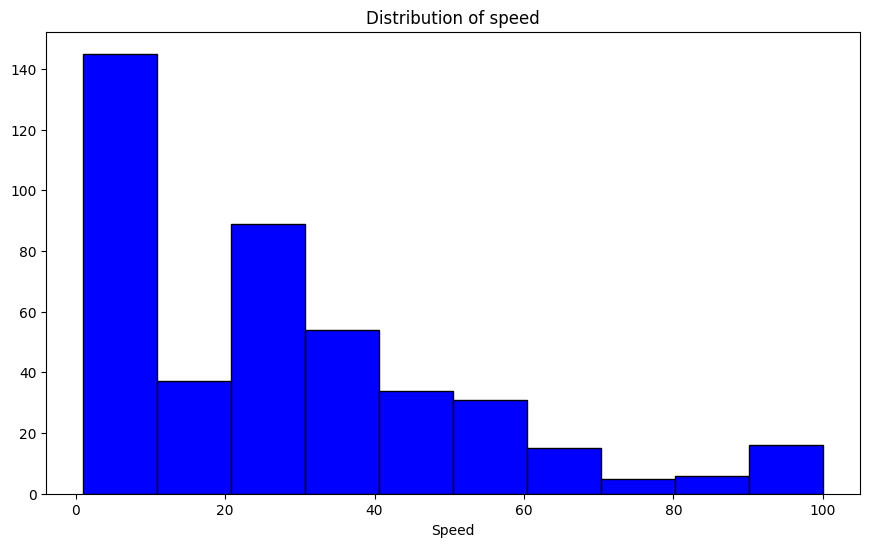

In [35]:
'''Draw a histogram for speed of super heroes having fig size 10.5,
  provide speed in histogram for only good alignment superheroes,
  title should be "distribution of speed", xlabel should be "speed" '''

values = good_charac.select("Speed").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(10.5, 6))
plt.hist(values, bins = 10, color = 'blue', edgecolor = 'black')

plt.title("Distribution of speed")
plt.xlabel("Speed")

plt.show()

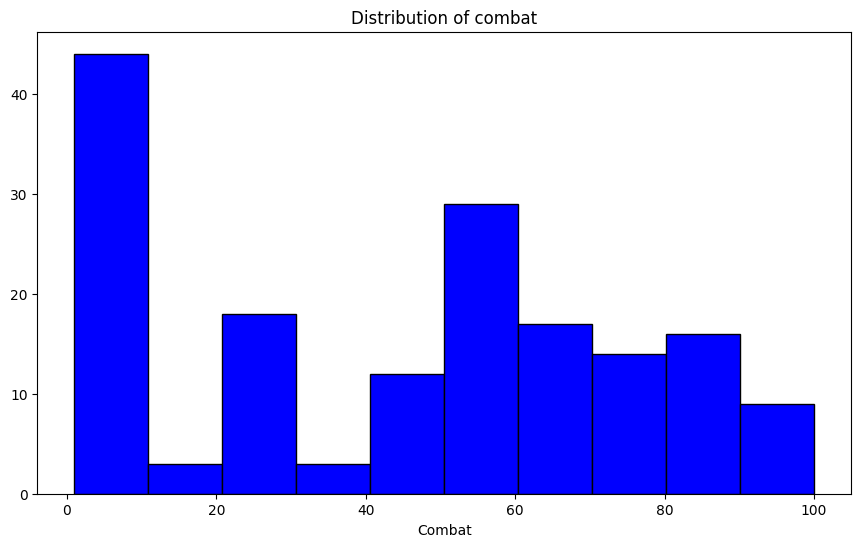

In [36]:
'''Draw a histogram for combat of super villains having fig size 10.5,
 provide combat in histogram for only bad alignment superheroes,
 title should be "distribution of combat", xlabel should be "combat" '''

values = villains.select("Combat").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(10.5, 6))
plt.hist(values, bins = 10, color = 'blue', edgecolor = 'black')

plt.title("Distribution of combat")
plt.xlabel("Combat")

plt.show()